In [171]:
import pandas as pd
import numpy as np

In [172]:
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [173]:
df = pd.read_csv('/content/life expectancy.csv')
df

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [174]:
# Checking for possible missing values in dataset
missing_values = df.isnull().sum()
missing_values


Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [175]:
# Replace missing values with NaN
df.replace('', np.nan)
df

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [176]:
# Remove duplicates from dataset
df.drop_duplicates()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [177]:
# dropping missing data
df.dropna()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
698,Albania,ALB,Europe & Central Asia,Upper middle income,2005,75.228,8.9,4030.000210,6.335542,3.281550,15.970000,3.0,41.875655,94241.87,99241.18,568930.66
702,Armenia,ARM,Europe & Central Asia,Upper middle income,2005,72.626,12.3,4460.000038,5.861883,2.712030,10.203000,2.5,46.657125,92659.79,105444.38,793047.77
707,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,2005,68.747,4.8,30040.000916,2.261077,2.974620,7.260000,2.5,23.121008,240229.35,826520.96,2003781.90
724,Central African Republic,CAF,Sub-Saharan Africa,Low income,2005,44.744,39.6,219.999999,4.367321,1.652220,5.695000,2.5,19.090005,310132.64,3766393.86,805165.65
737,Djibouti,DJI,Middle East & North Africa,Lower middle income,2005,57.991,31.3,430.000007,3.224672,8.365890,27.719999,2.5,25.705269,28409.67,310769.59,115615.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2019,70.385,13.0,150.000006,5.529762,5.921550,14.144000,3.5,33.535911,4293.10,16170.29,33337.54
3285,Chad,TCD,Sub-Saharan Africa,Low income,2019,54.239,31.7,2250.000000,4.353631,2.372460,1.123000,2.5,9.951136,626720.09,8496915.83,2459705.38
3286,Togo,TGO,Sub-Saharan Africa,Low income,2019,61.042,20.1,2369.999886,5.726069,4.069143,3.719000,3.0,9.103834,246081.26,1992666.23,1190315.76
3294,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,2019,65.456,23.4,12449.999809,3.827693,3.596836,2.222000,3.0,26.238278,1478236.12,13341065.72,8469064.37


## 1. Univariate Analysis

Unemployment Across Different Countries- Unemployment in this dataset refers to the % share of the labor force that is without work but available for and seeking employment

In [235]:
# Mean of Unemployment
mean_unemployment = df['Unemployment'].mean()
print (mean_unemployment)

7.890760492220729


In [228]:
# Mean of Life Expectancy
mean_LE = df['Life Expectancy World Bank'].mean()
print (mean_LE)

69.74836158262802


In [231]:
# Mean of Prevelance of Undernourishment
mean_UN = df['Prevelance of Undernourishment'].mean()
print (mean_UN)

10.663653699466057


In [233]:
# Mean of CO2
mean_CO2 = df['CO2'].mean()
print (mean_CO2)

157492.4126899346


In [234]:
# Mean of Health Expenditure %
mean_HE = df['Health Expenditure %'].mean()
print (mean_HE)

6.36405906284389


In [237]:
# Mode of Unemployment
mode_unemployment = df['Unemployment'].mode()
print (mode_unemployment)

0    4.0
Name: Unemployment, dtype: float64


In [236]:
# Mode of Life Expectancy
mode_LE = df['Life Expectancy World Bank'].mode()
print (mode_LE)

0    80.702439
Name: Life Expectancy World Bank, dtype: float64


In [180]:
# Median
median_unemployment = df['Unemployment'].median()
print (median_unemployment)

5.92000007629395


In [181]:
# Range
df_range_unemployment = df['Unemployment'].max() - df['Unemployment'].min()
print (df_range_unemployment)

37.149999998509884


In [182]:
# Variance
variance_unemployment = np.var(df['Unemployment'])
print (variance_unemployment)

39.310233207565446


In [183]:
# Standard Deviation
std_deviation_unemployment = np.std(df['Unemployment'])
print (std_deviation_unemployment)

6.26978733351981


In [184]:
# IQR
# I used the Injuries column for this. This is the definition of Injuries according to the dataset source, "Disability-Adjusted Life Years (DALYs) due to injuries - One DALY represents the loss of the equivalent of one year of full health. DALYs for a injuries or health condition is the sum of the years of life lost due to premature mortality (YLLs) and the years lived with a disability (YLDs) due to prevalent cases of the disease in a population"
q1_injuries = np.percentile(df['Injuries'], 25)
q3_injuries = np.percentile(df['Injuries'], 75)
print("Q1 Injuries:", q1_injuries)
print("Q3 Injuries:", q3_injuries)

Q1 Injuries: 62456.8775
Q3 Injuries: 846559.1224999999


In [185]:
IQR_injuries = q3_injuries - q1_injuries
print ("IQR Injuries :", IQR_injuries)

IQR Injuries : 784102.2449999999


Histograms

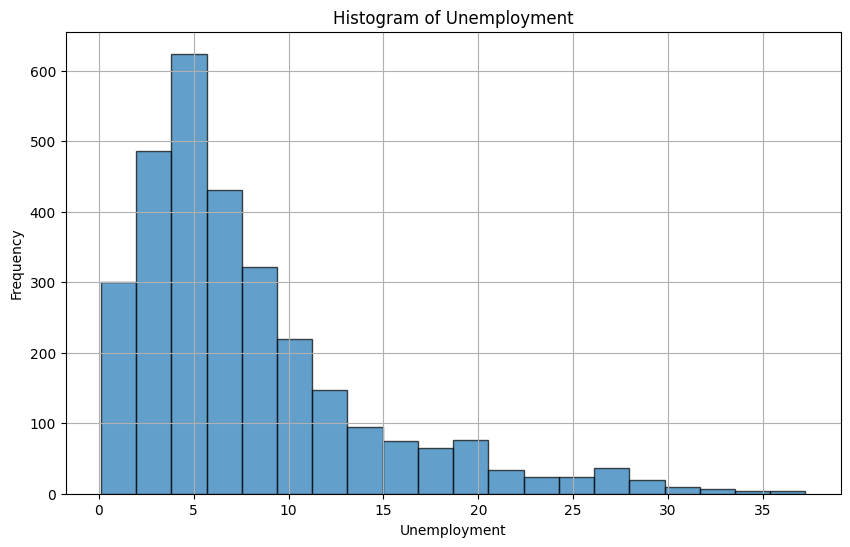

In [186]:
# Unemployment Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Unemployment'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


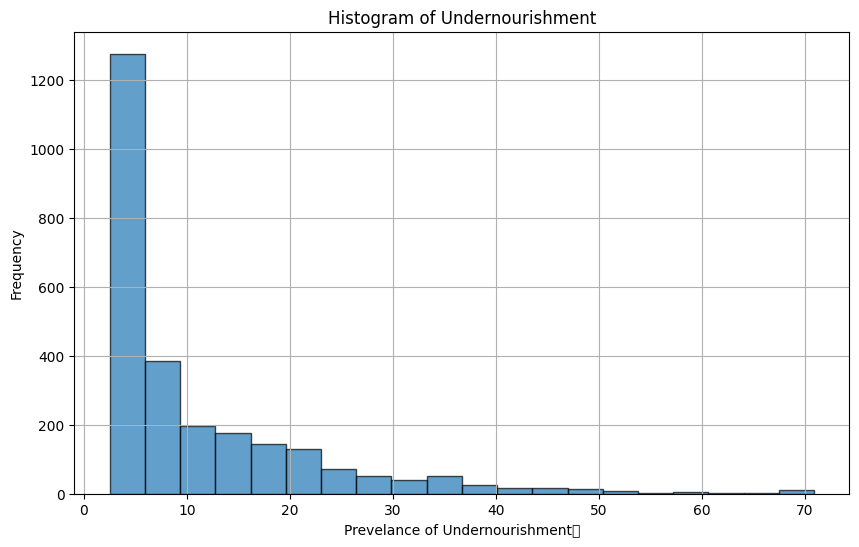

In [187]:
# Undernourishment Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Prevelance of Undernourishment'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Prevelance of Undernourishment	')
plt.ylabel('Frequency')
plt.title('Histogram of Undernourishment')
plt.grid()
plt.show()

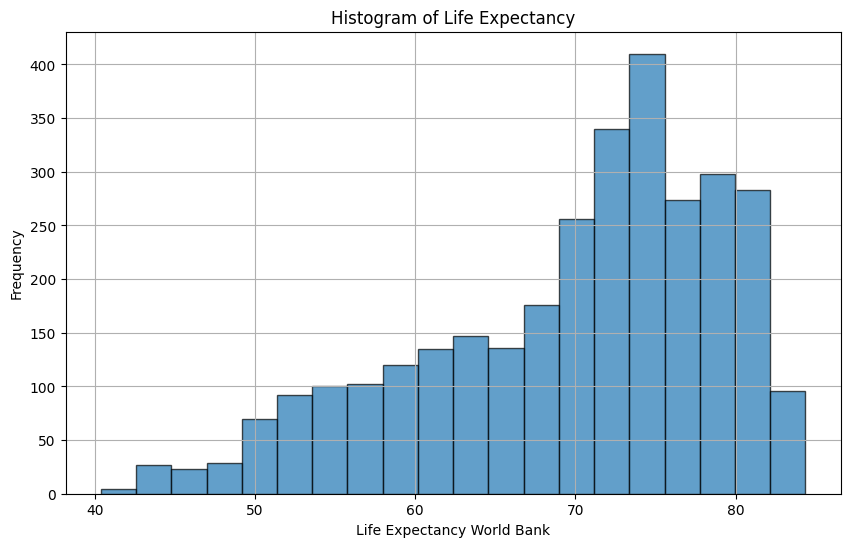

In [188]:
# Life Expectancy (according to the World Bank)
plt.figure(figsize=(10, 6))
plt.hist(df['Life Expectancy World Bank'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Life Expectancy World Bank')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.grid()
plt.show()


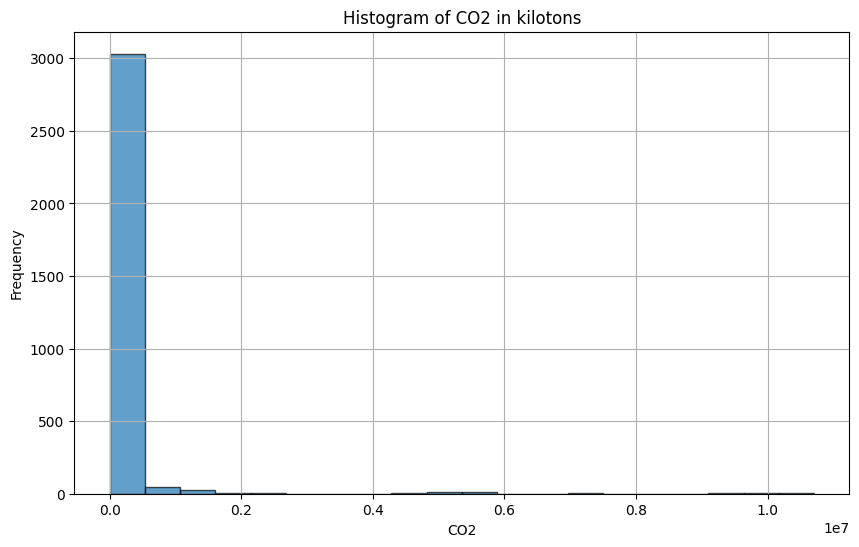

In [189]:
# CO2 in kilotons
plt.figure(figsize=(10, 6))
plt.hist(df['CO2'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 in kilotons')
plt.grid()
plt.show()

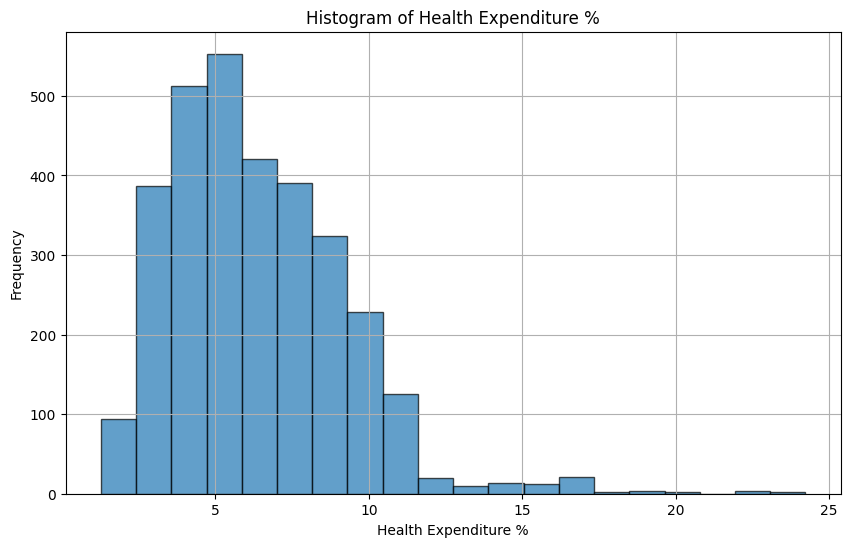

In [192]:
# Health Expenditure %: Defined in the dataset source as expenditure on healthcare as % of GDP
plt.figure(figsize=(10, 6))
plt.hist(df['Health Expenditure %'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Health Expenditure %')
plt.ylabel('Frequency')
plt.title('Histogram of Health Expenditure %')
plt.grid()
plt.show()

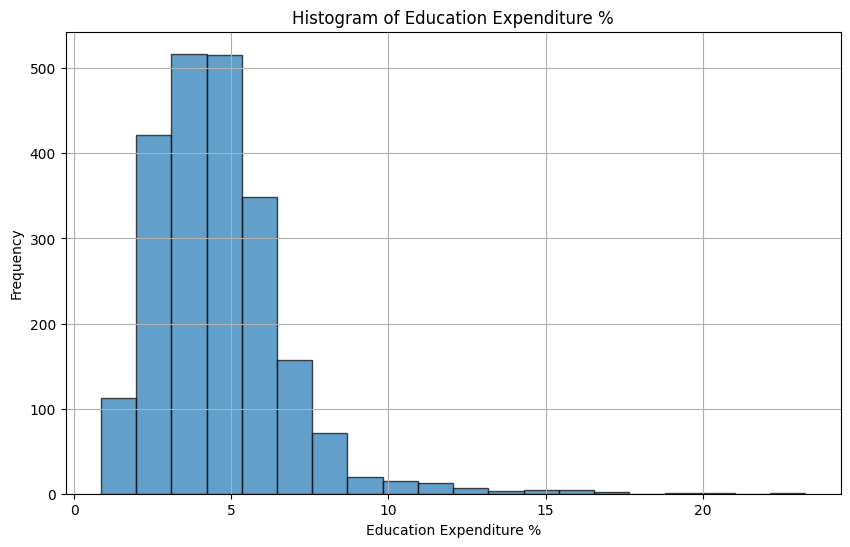

In [247]:
# Education Expenditure %: Defined in the dataset source as expenditure on education as % of GDP
plt.figure(figsize=(10, 6))
plt.hist(df['Education Expenditure %'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Education Expenditure %')
plt.ylabel('Frequency')
plt.title('Histogram of Education Expenditure %')
plt.grid()
plt.show()

## 2. Bivariate Analysis

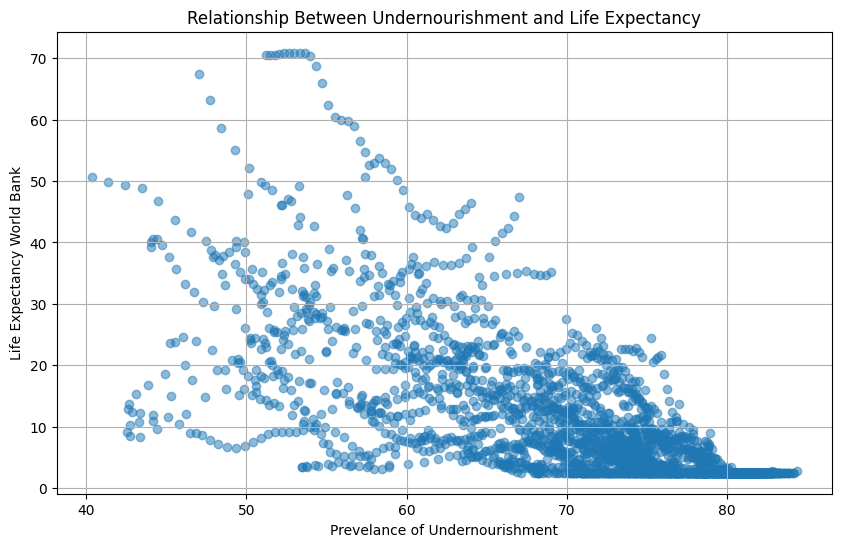

In [194]:
# Scatter Plot to look at relationship between Prevelance of Undernourishment and Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['Life Expectancy World Bank'], df['Prevelance of Undernourishment'], alpha=0.5)
plt.title('Relationship Between Undernourishment and Life Expectancy')
plt.xlabel('Prevelance of Undernourishment')
plt.ylabel('Life Expectancy World Bank')
plt.grid(True)
plt.show()

# It looks like the higher the prevalence of  undernourishment, the lower the life expectancy

In [208]:
correlation_spearman = df.corr()
print(correlation_spearman)

                                    Year  Life Expectancy World Bank  \
Year                            1.000000                    0.203013   
Life Expectancy World Bank      0.203013                    1.000000   
Prevelance of Undernourishment -0.144081                   -0.686749   
CO2                             0.023258                    0.130382   
Health Expenditure %            0.093686                    0.326404   
Education Expenditure %         0.029346                    0.208019   
Unemployment                   -0.050321                   -0.056668   
Corruption                     -0.013471                    0.263566   
Sanitation                      0.117233                    0.680025   
Injuries                       -0.005951                   -0.006020   
Communicable                   -0.037286                   -0.217812   
NonCommunicable                 0.018347                    0.044476   

                                Prevelance of Undernourishment 

<ipython-input-208-6904ca6a7735>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_spearman = df.corr()


I noticed that the correlation coefficient for CO2 levels vs Non Communicable diseases was 0.820186 which indicates a strong correlation between these two variables.
The correlation coefficienct for Undernourishment vs Life Expectancy was -0.686749 which shows a moderate correlation. I thought that this number would have been closer to -1.0.

Spearman Correlation Matrix:
                                Prevelance of Undernourishment  \
Prevelance of Undernourishment                         1.00000   
Life Expectancy World Bank                            -0.77975   

                                Life Expectancy World Bank  
Prevelance of Undernourishment                    -0.77975  
Life Expectancy World Bank                         1.00000  


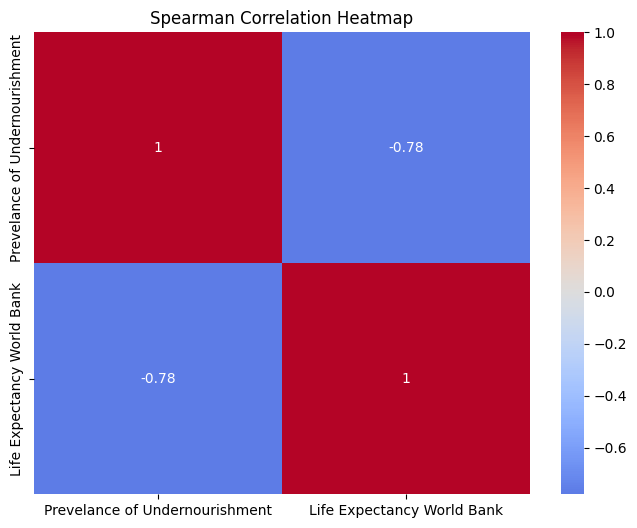

In [209]:
# Heatmap displaying Spearman correlation matrix measuring correlation between Undernourishment and Life Expectancy
spearman_corr = df[['Prevelance of Undernourishment','Life Expectancy World Bank']].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_corr)

# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")


plt.show()

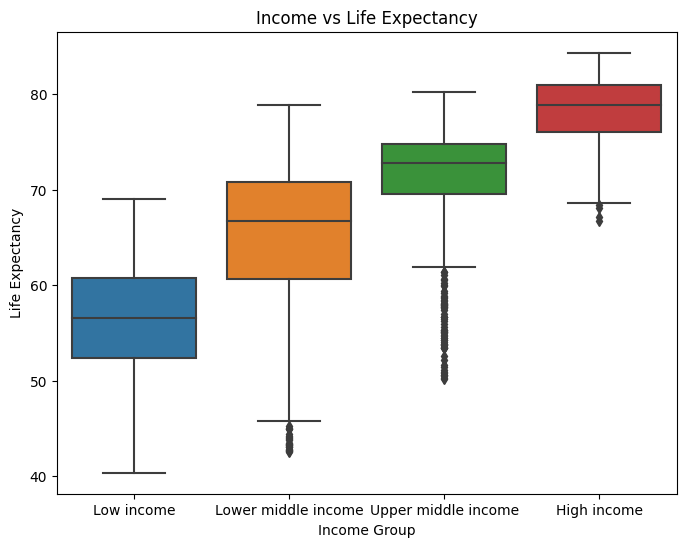

In [253]:
# Creating a box plot to exam the variables of Income vs Life Expectancy
plt.figure(figsize=(8, 6))
sns.boxplot(x='IncomeGroup', y='Life Expectancy World Bank', data=df)
plt.title('Income vs Life Expectancy')
plt.xlabel('Income Group')
plt.ylabel('Life Expectancy')
plt.show()


## 3. Handling Outliers:

In [223]:
# IQR Method to look at Life Expectancy:

LE = 'Life Expectancy World Bank'
q1 = df[LE].quantile(0.25)
q3 = df[LE].quantile(0.75)
iqr1 = q3 - q1

# Setting threshold for outlier detection

threshold_lower = q1 - 1.5 * iqr1
threshold_upper = q3 + 1.5 * iqr1

# Identifying outliers

outliers = [x for x in df['Life Expectancy World Bank'] if x < threshold_lower or x > threshold_upper]

# Printing outliers
print("Outliers:", outliers)

Outliers: [40.369, 41.376, 43.523, 43.845, 42.419, 43.372, 43.195, 43.083, 43.467, 42.731, 43.065, 42.658, 42.518, 43.241, 42.595, 42.733, 43.853, 42.854, 43.308, 43.384]


I would retain these outliers because it makes sense that between the years of 2000 and 2019, people around the world are living past 45 years of age.

In [216]:
# IQR Method to look at Undernourishment:

UN = 'Prevelance of Undernourishment'
q1 = df[UN].quantile(0.25)
q3 = df[UN].quantile(0.75)
iqr1 = q3 - q1

# Setting threshold for outlier detection

threshold_lower = q1 - 1.5 * iqr1
threshold_upper = q3 + 1.5 * iqr1

# Identifying outliers

outliers = [x for x in df['Life Expectancy World Bank'] if x < threshold_lower or x > threshold_upper]

# Printing outliers
print("Outliers:", outliers)

Outliers: [56.308, 47.059, 74.288, 74.544, 73.755, 71.8, 74.171, 79.63414634146342, 78.57560975609756, 67.054, 49.93, 77.97317073170734, 55.668, 50.893, 65.956, 71.76829268292684, 74.635, 74.637, 68.50731707317074, 69.04, 77.88536585365854, 63.054, 70.462, 77.362, 61.808, 50.281, 44.061, 79.33902439024392, 80.18048780487806, 76.634, 71.732, 49.495, 51.222, 73.241, 59.529, 77.601, 76.905, 78.139, 78.32926829268293, 57.1, 76.79268292682929, 69.69, 71.116, 73.078, 55.864, 79.36829268292684, 70.25853658536586, 52.595, 77.96585365853659, 65.863, 79.15853658536587, 57.968, 77.99268292682927, 70.065, 57.158, 51.255, 50.744, 53.581, 78.38780487804878, 72.805, 66.70926829268294, 68.304, 75.373, 65.532, 70.976, 74.51292682926831, 57.382, 72.2487804878049, 66.037, 62.907, 77.13414634146342, 68.983, 80.69024390243904, 79.40731707317074, 80.12682926829268, 74.139, 71.907, 81.41707317073171, 65.76, 51.101, 59.335, 63.446, 73.21, 74.999, 52.236, 71.038, 72.233, 46.197, 71.65853658536585, 77.824390243

I would retain these outliers because in war-torn countries and countries in which people are living in poverty, it would make sense that they have limited access to necessities such as clean water and healthy foods. I do however think that with countries that are considered to be "developed" such as the United States, the data needs to be broken down even further. This is because in certain areas in the United States, there are communities of people living in food deserts while people with higher incomes have the means to afford nutritional and organic foods.

In [218]:
# IQR Method to look at Unemployment:

UE = 'Unemployment'
q1 = df[UE].quantile(0.25)
q3 = df[UE].quantile(0.75)
iqr1 = q3 - q1

# Setting threshold for outlier detection

threshold_lower = q1 - 1.5 * iqr1
threshold_upper = q3 + 1.5 * iqr1

# Identifying outliers

outliers = [x for x in df['Life Expectancy World Bank'] if x < threshold_lower or x > threshold_upper]

# Printing outliers
print("Outliers:", outliers)

Outliers: [56.308, 47.059, 74.288, 74.544, 73.755, 71.8, 74.171, 79.63414634146342, 78.57560975609756, 67.054, 49.93, 77.97317073170734, 55.668, 50.893, 65.956, 71.76829268292684, 74.635, 74.637, 68.50731707317074, 69.04, 77.88536585365854, 63.054, 70.462, 77.362, 61.808, 50.281, 44.061, 79.33902439024392, 80.18048780487806, 76.634, 71.732, 49.495, 51.222, 73.241, 59.529, 77.601, 76.905, 78.139, 78.32926829268293, 57.1, 76.79268292682929, 69.69, 71.116, 73.078, 55.864, 79.36829268292684, 70.25853658536586, 52.595, 77.96585365853659, 65.863, 79.15853658536587, 57.968, 77.99268292682927, 70.065, 57.158, 51.255, 50.744, 53.581, 78.38780487804878, 72.805, 66.70926829268294, 68.304, 75.373, 65.532, 70.976, 74.51292682926831, 57.382, 72.2487804878049, 66.037, 62.907, 77.13414634146342, 68.983, 80.69024390243904, 79.40731707317074, 80.12682926829268, 74.139, 71.907, 81.41707317073171, 65.76, 51.101, 59.335, 63.446, 73.21, 74.999, 52.236, 71.038, 72.233, 46.197, 71.65853658536585, 77.824390243

I would retain these outliers because this dataset includes data from the year 2000 all the way to 2019. In 2001, I would think that the unemployment rate in countries being affected by war would rise. It would also make sense for the unemployment rate to be higher during and after 2009 due to the recession. It would be interesting to see the data on unemployment after 2020 because of the pandemic and compare it with the unemployment data for 2019 and previous years.

In [224]:
# IQR Method to look at Sanitation:

SA = 'Sanitation'
q1 = df[SA].quantile(0.25)
q3 = df[SA].quantile(0.75)
iqr1 = q3 - q1

# Setting threshold for outlier detection

threshold_lower = q1 - 1.5 * iqr1
threshold_upper = q3 + 1.5 * iqr1

# Identifying outliers

outliers = [x for x in df['Life Expectancy World Bank'] if x < threshold_lower or x > threshold_upper]

# Printing outliers
print("Outliers:", outliers)

Outliers: []


There were no outliers for Sanitation. The dataset source defines Sanitation as the percent of the population of a country using safely managed sanitation services.

## 4. Automated Analysis

In [225]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3366a3634863684fae3e1f9ca2a52605ecd517807b81c12e1b88447c84de88bf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [227]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
df = pd.read_csv('/content/life expectancy.csv')

# Generate the EDA report
report = ProfileReport(df)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [229]:
# downloading EDA report
from google.colab import files
files.download ('eda_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>